# Lets plot the pump consumption

In [2]:
import pandas as pd

In [3]:
def replace_vertical_line_with_comma(input_file, output_file):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    # Replace vertical line '|' with comma ',' in each line
    modified_lines = [line.replace('|', ',') for line in lines]

    # Write the modified content to the output file
    with open(output_file, 'w') as outfile:
        outfile.writelines(modified_lines)

    print(f"File saved as {output_file}")

# Example usage:
input_file = "data/Vatnsendi_Rjupnasalir_pumpPower.csv"  # Path to the input CSV file
output_file = 'Vatnsendi_rjupnasalir_pumppower_modfied.csv'  # Path for the output CSV file

#replace_vertical_line_with_comma(input_file, output_file)


In [4]:


def extract_columns_to_dataframe(input_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Extract only the required columns: mpoint_id, start_time, and value
    df_filtered = df[['mpoint_id', 'start_time', 'value']]
    
    # Convert 'value' column to numeric (if necessary), handling errors (e.g., converting 'NULL' to NaN)
    df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')
    
    return df_filtered

# Example usage:
input_file = 'Vatnsendi_rjupnasalir_pumppower_modfied.csv'  # Path to the CSV file

# Extract the columns into a DataFrame
df_result = extract_columns_to_dataframe(input_file)

df_result = df_result.copy()
# Display the DataFrame
print(df_result)


                mpoint_id           start_time      value
0       H-KOP-VE-DÆ222-PS  2022-01-14 20:00:00   0.000000
1       H-KOP-VE-DÆ222-PS  2022-01-14 10:00:00   0.000000
2       H-KOP-VE-DÆ222-PS  2022-01-14 02:00:00   0.000000
3       H-KOP-VE-DÆ222-PS  2022-01-15 15:00:00   0.000000
4       H-KOP-VE-DÆ222-PS  2022-01-18 17:00:00   0.000000
...                   ...                  ...        ...
167040  H-KOP-RS-DÆ211-PS  2025-03-05 21:00:00  10.791466
167041  H-KOP-RS-DÆ212-PS  2025-03-05 21:00:00  29.629678
167042  H-KOP-RS-DÆ222-PS  2025-03-05 21:00:00  30.687266
167043  H-KOP-VE-DÆ212-PS  2025-03-05 21:00:00  26.769442
167044  H-KOP-VE-DÆ213-PS  2025-03-05 21:00:00  12.254310

[167045 rows x 3 columns]


/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/1838809404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')


In [5]:
import pandas as pd

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)].copy()

# Convert 'start_time' column to datetime
df_filtered['start_time'] = pd.to_datetime(df_filtered['start_time'])

# Filter only the data from the year 2024
df_filtered_2024 = df_filtered[df_filtered['start_time'].dt.year == 2024]

# Dictionary to hold each pump's 2024 DataFrame
pump_dfs_2024 = {}

# Create a DataFrame for each unique 'mpoint_id'
for mpoint_id in mpoint_ids:
    pump_df = df_filtered_2024[df_filtered_2024['mpoint_id'] == mpoint_id].copy()
    
    # Drop the mpoint_id column and set 'start_time' as the index
    pump_df = pump_df.drop(columns=['mpoint_id']).set_index('start_time')
    
    # Store the processed DataFrame
    pump_dfs_2024[mpoint_id] = pump_df
    
    # Print the first few rows of the DataFrame for each pump
    print(f"First 5 rows for {mpoint_id} in 2024:")
    print(pump_dfs_2024[mpoint_id].head(), "\n")


First 5 rows for H-KOP-RS-DÆ212-PS in 2024:
                         value
start_time                    
2024-01-19 13:00:00  34.493768
2024-01-19 15:00:00  38.177865
2024-01-19 20:00:00  38.515497
2024-01-17 04:00:00  30.882435
2024-01-19 08:00:00  35.062060 

First 5 rows for H-KOP-RS-DÆ222-PS in 2024:
                         value
start_time                    
2024-01-19 13:00:00  34.857920
2024-01-19 20:00:00  39.132801
2024-01-17 04:00:00  31.394952
2024-01-19 08:00:00  35.427114
2024-01-06 08:00:00  27.395261 

First 5 rows for H-KOP-VE-DÆ212-PS in 2024:
                     value
start_time                
2024-01-19 13:00:00    0.0
2024-01-19 20:00:00    0.0
2024-01-17 04:00:00    0.0
2024-01-19 08:00:00    0.0
2024-01-19 14:00:00    0.0 

First 5 rows for H-KOP-VE-DÆ213-PS in 2024:
                     value
start_time                
2024-01-19 13:00:00    0.0
2024-01-19 17:00:00    0.0
2024-01-18 15:00:00    0.0
2024-01-19 20:00:00    0.0
2024-01-17 04:00:00    0.0 

Firs

In [6]:
pump_dfs_2024["H-KOP-RS-DÆ212-PS"]


,value
start_time,
2024-01-19 13:00:00,34.493768
2024-01-19 15:00:00,38.177865
2024-01-19 20:00:00,38.515497
2024-01-17 04:00:00,30.882435
2024-01-19 08:00:00,35.062060
...,...
2024-12-30 03:00:00,33.383431
2024-12-29 23:00:00,34.652756
2024-12-29 21:00:00,35.619059


In [7]:
for pump_id, df in pump_dfs_2024.items():
    yearly_avg = df['value'].mean()
    df['relative_change'] = df['value'] / yearly_avg


pump_dfs_2024["H-KOP-RS-DÆ212-PS"]


,value,relative_change
start_time,,
2024-01-19 13:00:00,34.493768,1.577167
2024-01-19 15:00:00,38.177865,1.745616
2024-01-19 20:00:00,38.515497,1.761054
2024-01-17 04:00:00,30.882435,1.412045
2024-01-19 08:00:00,35.062060,1.603152
...,...,...
2024-12-30 03:00:00,33.383431,1.526399
2024-12-29 23:00:00,34.652756,1.584437
2024-12-29 21:00:00,35.619059,1.628619


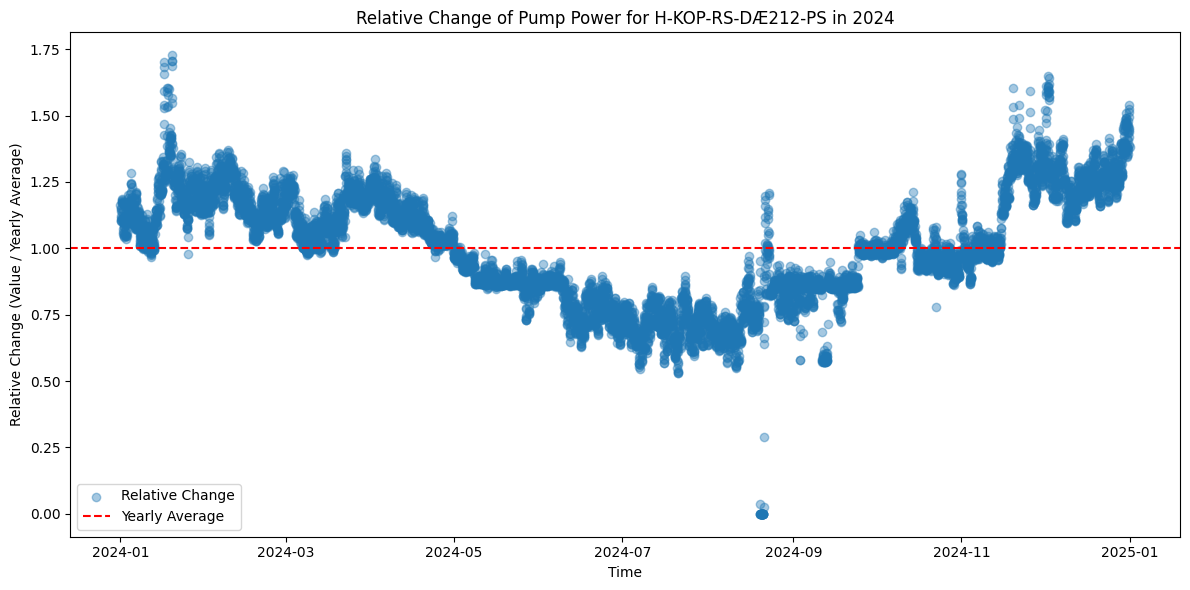

In [8]:
import matplotlib.pyplot as plt

df = pump_dfs_2024["H-KOP-RS-DÆ222-PS"]

plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['relative_change'], label='Relative Change',alpha=0.4)
plt.axhline(1, color='red', linestyle='--', label='Yearly Average')
plt.title("Relative Change of Pump Power for H-KOP-RS-DÆ212-PS in 2024")
plt.xlabel("Time")
plt.ylabel("Relative Change (Value / Yearly Average)")
plt.legend()
plt.tight_layout()
plt.show()


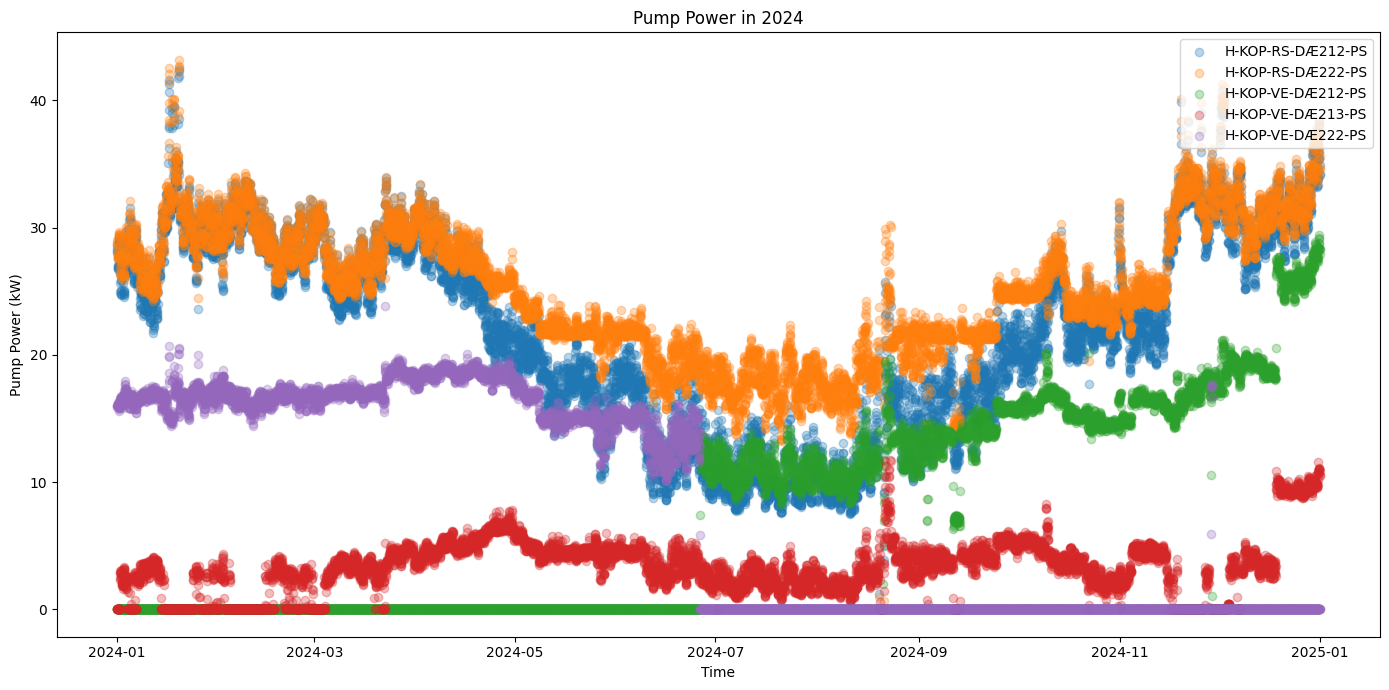

In [9]:
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(14, 7))


# Plot each pump's data
for mpoint_id, df in pump_dfs_2024.items():
    plt.scatter(df.index, df['value'], label=mpoint_id,alpha = 0.3)

# Labeling
plt.title("Pump Power in 2024")
plt.xlabel("Time")
plt.ylabel("Pump Power (kW)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/149192217.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab10', len(pump_ids))  # change to 'tab20' if >10 pumps


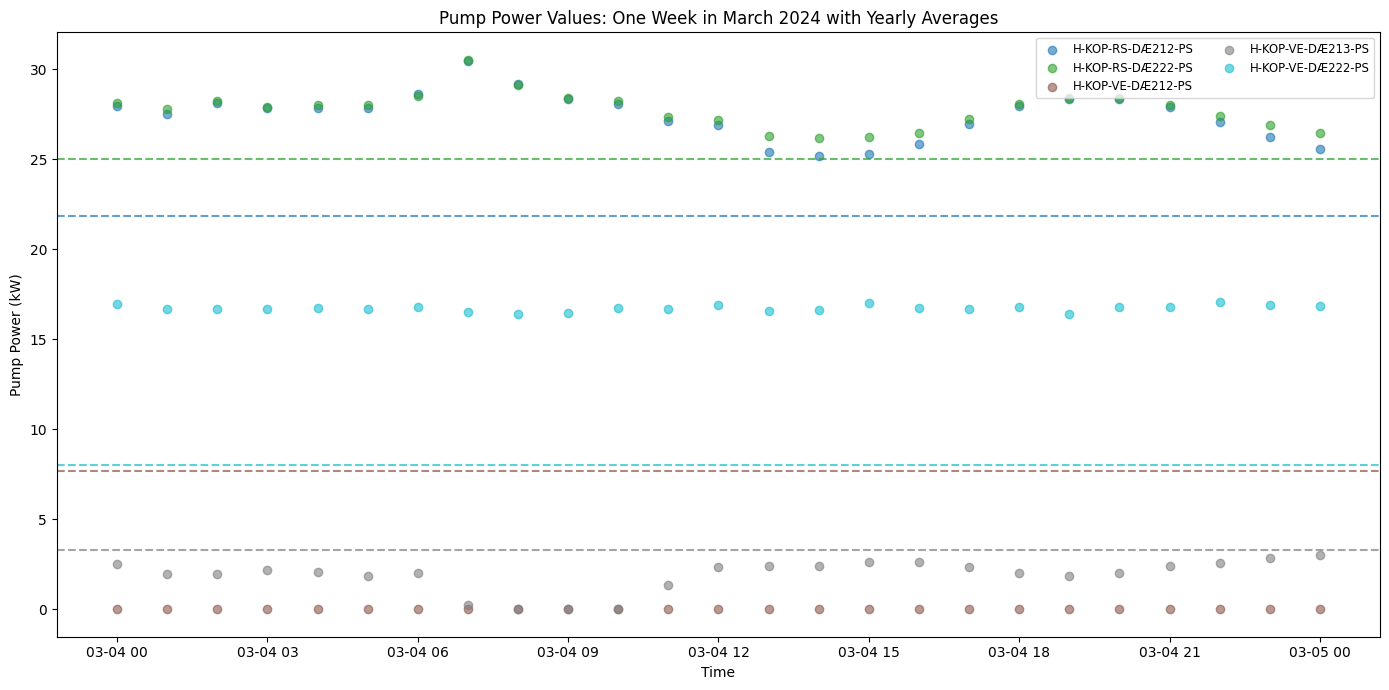

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt

# Define start and end of the week
start_date = datetime(2024, 3, 4)
end_date = datetime(2024, 3, 5)

# Filter each DataFrame in the dictionary
pump_dfs_march_week = {
    mpoint_id: df.loc[(df.index >= start_date) & (df.index <= end_date)]
    for mpoint_id, df in pump_dfs_2024.items()
}

# Assign a consistent color for each pump
pump_ids = list(pump_dfs_march_week.keys())
color_map = plt.cm.get_cmap('tab10', len(pump_ids))  # change to 'tab20' if >10 pumps
colors = {mpoint_id: color_map(i) for i, mpoint_id in enumerate(pump_ids)}

# Plot
plt.figure(figsize=(14, 7))

for mpoint_id, df in pump_dfs_march_week.items():
    color = colors[mpoint_id]

    # Scatter plot for values
    plt.scatter(df.index, df['value'], label=mpoint_id, alpha=0.6, color=color)

    # Yearly average line
    yearly_avg = pump_dfs_2024[mpoint_id]['value'].mean()
    plt.axhline(y=yearly_avg, linestyle='--', alpha=0.7, color=color)

plt.title("Pump Power Values: One Week in March 2024 with Yearly Averages")
plt.xlabel("Time")
plt.ylabel("Pump Power (kW)")
plt.legend(loc="upper right", fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


In [14]:
from datetime import datetime

# Define date range
start_date = datetime(2024, 3, 4)
end_date = datetime(2024, 3, 5)

# Print values for each pump in the date range
for pump_id, df in pump_dfs_2024.items():
    print(f"\n--- {pump_id} ---")
    filtered_df = df.loc[(df.index >= start_date) & (df.index <= end_date)]
    print(filtered_df)



--- H-KOP-RS-DÆ212-PS ---
                         value  relative_change
start_time                                     
2024-03-04 04:00:00  27.830972         1.272523
2024-03-05 00:00:00  25.584196         1.169793
2024-03-04 01:00:00  27.513405         1.258002
2024-03-04 02:00:00  28.146887         1.286967
2024-03-04 22:00:00  27.056127         1.237094
2024-03-04 03:00:00  27.843688         1.273104
2024-03-04 23:00:00  26.218558         1.198798
2024-03-04 21:00:00  27.903842         1.275855
2024-03-04 00:00:00  27.973446         1.279037
2024-03-04 20:00:00  28.314613         1.294636
2024-03-04 07:00:00  30.455113         1.392507
2024-03-04 06:00:00  28.637141         1.309383
2024-03-04 19:00:00  28.336372         1.295631
2024-03-04 18:00:00  27.955934         1.278236
2024-03-04 15:00:00  25.275601         1.155683
2024-03-04 16:00:00  25.857945         1.182309
2024-03-04 11:00:00  27.142595         1.241048
2024-03-04 12:00:00  26.888447         1.229427
2024-03-04 10

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/3164343717.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/3164343717.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/3164343717.py:28: SettingWithCopyWarning: 
A value is trying to b

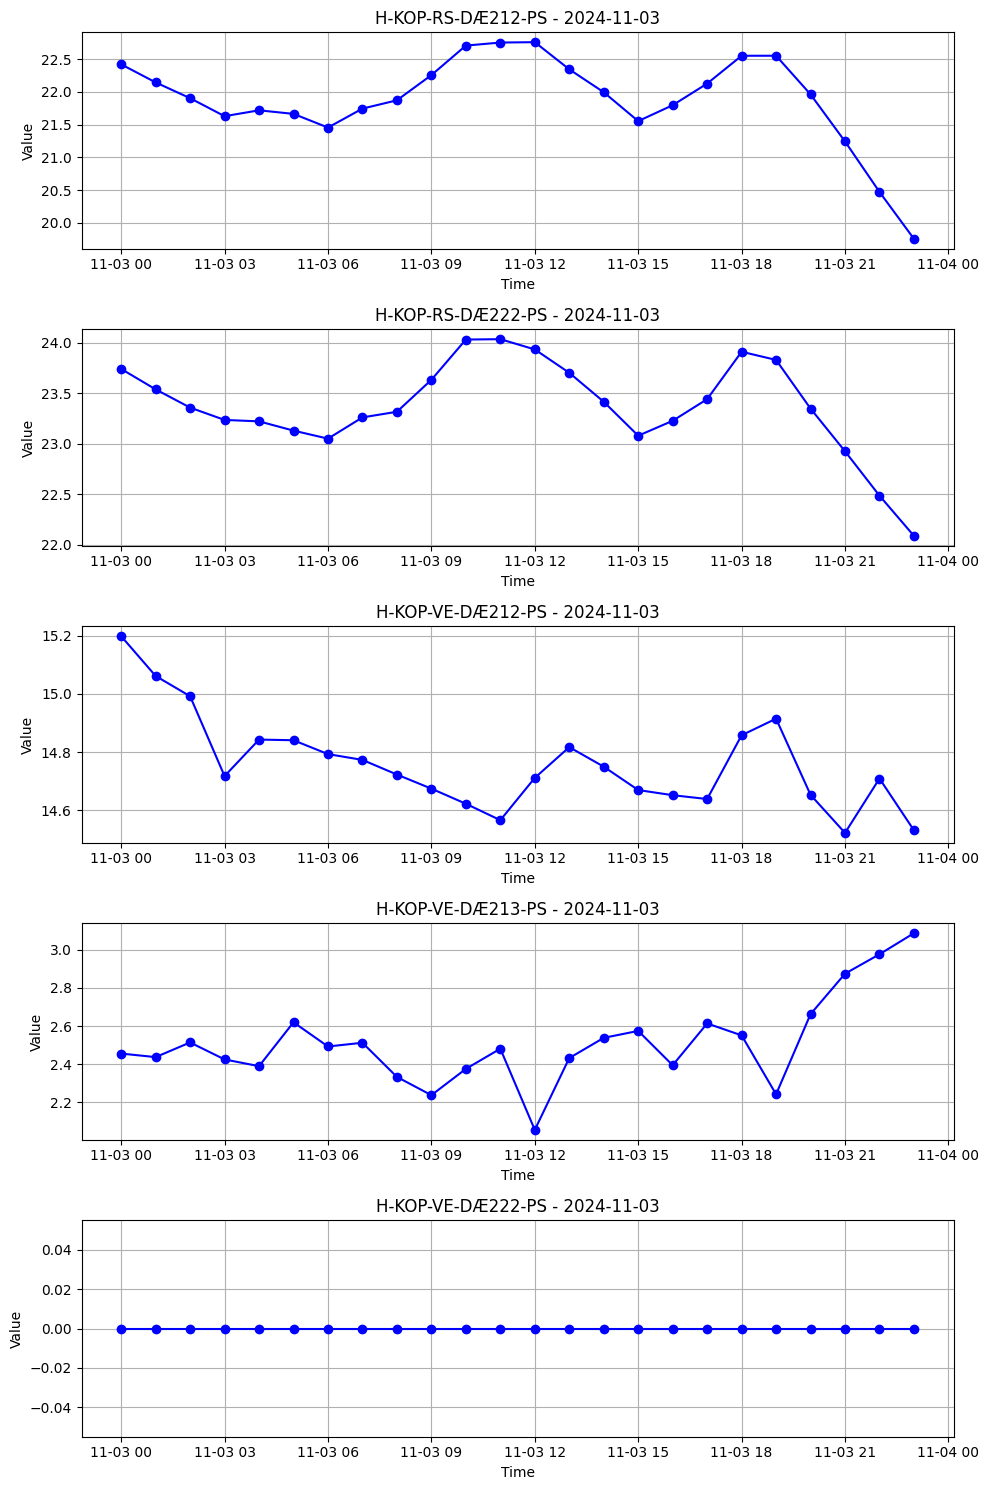

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Specify the date you want to filter by (e.g., '2024-11-03')
specific_date = "2024-11-03"

# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Group by 'mpoint_id' and create a DataFrame for each unique 'mpoint_id'
for idx, mpoint_id in enumerate(mpoint_ids):
    # Filter out the group for each pump
    pump_df = df_filtered[df_filtered['mpoint_id'] == mpoint_id]
    
    # Convert 'start_time' to datetime if not already
    pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
    
    # Sort the DataFrame by 'start_time' in ascending order
    pump_df_sorted = pump_df.sort_values(by='start_time', ascending=True)
    
    # Filter the DataFrame for the specific day
    pump_df_filtered = pump_df_sorted[pump_df_sorted['start_time'].dt.date == pd.to_datetime(specific_date).date()]
    
    # Create a DataFrame for the pump
    globals()[mpoint_id] = pump_df_filtered.drop(columns=['mpoint_id'])
    
    # Plot the 'value' against 'start_time' for the specific day
    axes[idx].plot(globals()[mpoint_id]['start_time'], globals()[mpoint_id]['value'], marker='o', linestyle='-', color='b')
    axes[idx].set_title(f"{mpoint_id} - {specific_date}")
    axes[idx].set_xlabel("Time")
    axes[idx].set_ylabel("Value")
    axes[idx].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/787005834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


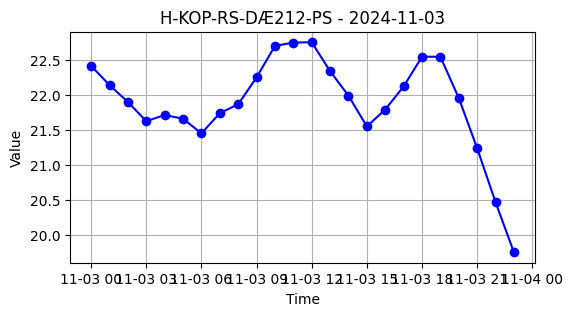

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/787005834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


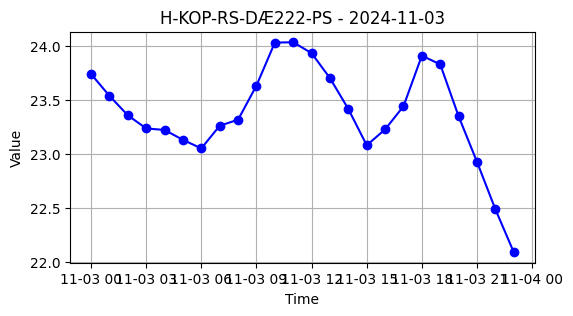

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/787005834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


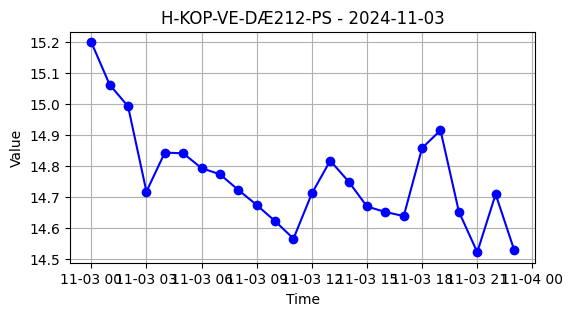

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/787005834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


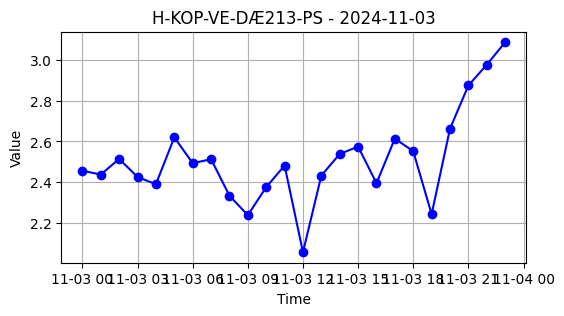

/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_27617/787005834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


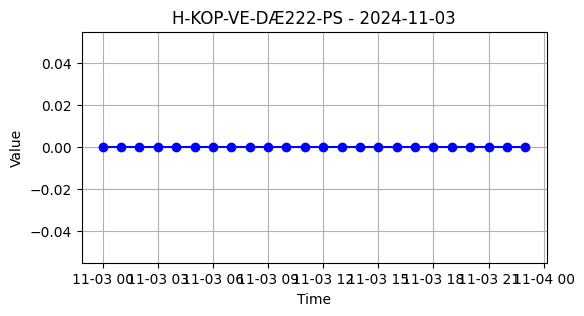

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Specify the date you want to filter by (e.g., '2024-11-03')
specific_date = "2024-11-03"

# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)]

# Create separate plots for each pump
for mpoint_id in mpoint_ids:
    # Filter out the group for each pump
    pump_df = df_filtered[df_filtered['mpoint_id'] == mpoint_id]
    
    # Convert 'start_time' to datetime if not already
    pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
    
    # Sort the DataFrame by 'start_time' in ascending order
    pump_df_sorted = pump_df.sort_values(by='start_time', ascending=True)
    
    # Filter the DataFrame for the specific day
    pump_df_filtered = pump_df_sorted[pump_df_sorted['start_time'].dt.date == pd.to_datetime(specific_date).date()]
    
    # Create a DataFrame for the pump
    globals()[mpoint_id] = pump_df_filtered.drop(columns=['mpoint_id'])
    
    # Create a new figure with the specified size (6,3)
    plt.figure(figsize=(6, 3))
    
    # Plot the 'value' against 'start_time' for the specific day
    plt.plot(globals()[mpoint_id]['start_time'], globals()[mpoint_id]['value'], marker='o', linestyle='-', color='b')
    
    # Set plot labels and title
    plt.title(f"{mpoint_id} - {specific_date}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
    # Show the plot
    plt.show()
